# Usage Examples for the Bayez Package

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import bayez
print bayez.__version__

0.1.dev234


## Template Samplers

Create prior samplers for different spectroscopic classes (takes ~30s each, except for ELG and ELGEM which take ~10mins):

In [3]:
qso_sampler = bayez.sampler.QSOSampler()

INFO:io.py:466:read_basis_templates: Reading /Data/DESI/basis_templates/v1.1/qso_templates_v1.1.fits


INFO:DESI:Reading /Data/DESI/basis_templates/v1.1/qso_templates_v1.1.fits


Loaded 8756 templates.


In [4]:
lrg_sampler = bayez.sampler.LRGSampler()

INFO:io.py:466:read_basis_templates: Reading /Data/DESI/basis_templates/v1.1/lrg_templates_v1.2.fits


INFO:DESI:Reading /Data/DESI/basis_templates/v1.1/lrg_templates_v1.2.fits


Loaded 144 templates.
144 templates pass the color cuts.
trimming from 47378 to 27372 wavelength bins.
Using stellar velocity dispersions: [ 148.540487    176.83162941  199.5262315   225.13346277  268.01256586] km/s


In [5]:
#elg_sampler = bayez.sampler.ELGSampler()

In [6]:
#elgem_sampler = bayez.sampler.ELGEMSampler()

In [7]:
star_sampler = bayez.sampler.StarSampler()

INFO:io.py:466:read_basis_templates: Reading /Data/DESI/basis_templates/v1.1/star_templates_v1.2.fits


INFO:DESI:Reading /Data/DESI/basis_templates/v1.1/star_templates_v1.2.fits


Loaded 616 templates.
trimming from 76486 to 31457 wavelength bins.


Plot some exemplars generated by each sampler:

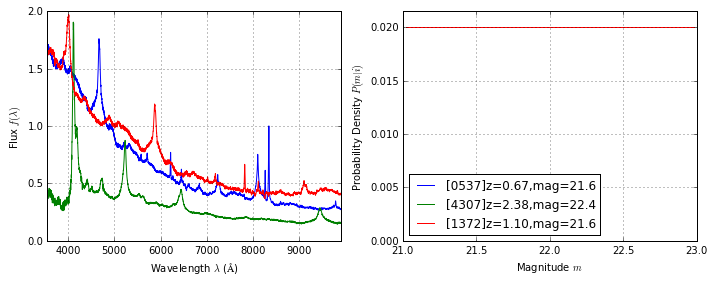

In [8]:
qso_sampler.plot_samples(num_samples=3, seed=7)

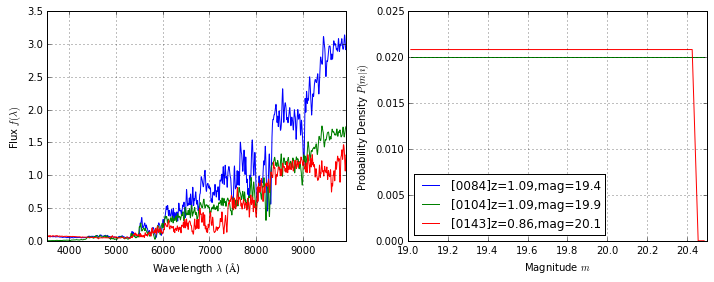

In [9]:
lrg_sampler.plot_samples(num_samples=3, seed=8)

In [10]:
#elg_sampler.plot_samples(num_samples=3, seed=1)

In [11]:
#elgem_sampler.plot_samples(num_samples=3, seed=1)

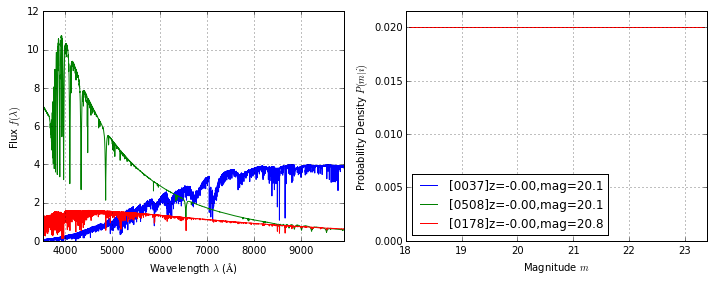

In [12]:
star_sampler.plot_samples(num_samples=3, seed=1)

## Instrument Simulation

Define a simulator that downsamples to 4A pixels:

In [13]:
simulator4 = bayez.simulation.Simulator(analysis_downsampling=4)

Exposure time is 1000.0s.
Simulation wavelength grid:  [ 3533.   3533.2  3533.4 ...,  9912.6  9912.8  9913. ]
Band b: simulation pixel limits are 180, 12080.
Band b: downsampled aligned pixel limits are 36, 2416.
Band r: simulation pixel limits are 10460, 21040.
Band r: downsampled aligned pixel limits are 2092, 4208.
Band z: simulation pixel limits are 19510, 31505.
Band z: downsampled aligned pixel limits are 3902, 6298.
Total length of analysis pixel vector is 1723.


## Priors

Priors can either be generated from a sampler and simulator, or else loaded from a FITS file.  The examples below are too small to be useful, but quick to demonstrate.  Priors are normally generated using the `prepare_bayez` command-line script.

In [14]:
qso_prior = bayez.prior.build_prior('qso', qso_sampler, simulator4, 100, seed=3000)

In [15]:
qso_prior.save('qso_small_prior.fits', clobber=True)

In [16]:
qso_prior = bayez.prior.load_prior('qso_small_prior.fits')

Plot the data vector associated with any exemplar of a prior:

/Users/david/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


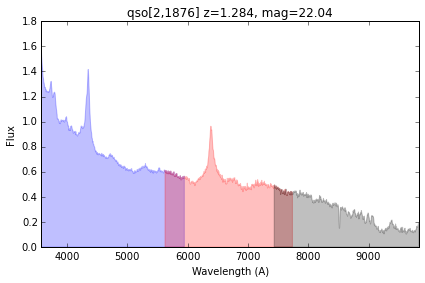

In [17]:
qso_prior.plot(2)

## Redshift Estimator

Create a QSO from a large prior stored in $BAYEZ_DATA using:
```
prepare_bayez --classname qso -k 40 --seed 3000 --verbose
```

In [18]:
import os
import os.path
path = os.environ.get('BAYEZ_DATA', '.')

In [19]:
qso_prior = bayez.prior.load_prior(os.path.join(path, 'qso_4_40k.fits'))
qso_estimator = bayez.estimator.RedshiftEstimator(qso_prior)

Run a small batch test of 100 examples.  Larger jobs are normally run using the `eval_bayez` command-line script.

In [20]:
results = bayez.analysis.estimate_batch(qso_estimator, 100, qso_sampler, simulator4, seed=11)

Starting at Tue Jan 19 09:08:07 2016.
Completed 100 / 100 trials (0 failed) at 1.477 sec/trial.


Examine the results for one simulated spectrum.  We pick this one because it has an interesting posterior:

In [21]:
results[91]

i,t_true,mag,z,dz_map,dz_avg,p_best,t_best,z95_lo,z68_lo,z50,z68_hi,z95_hi
int32,int32,float32,float32,float32,float32,int32,int32,float32,float32,float32,float32,float32
91,1634,22.8161,1.10044,0.0459082,0.0327963,14185,1522,1.09155,1.10044,1.14534,1.15722,1.17445


Inspect this example in more detail by specifying the same seed and index:

Generated [1634] z = 1.1004, mag = 22.82
Elapsed time 1.413s
MAP: z[14185] = 1.1464
<z> = 1.1332


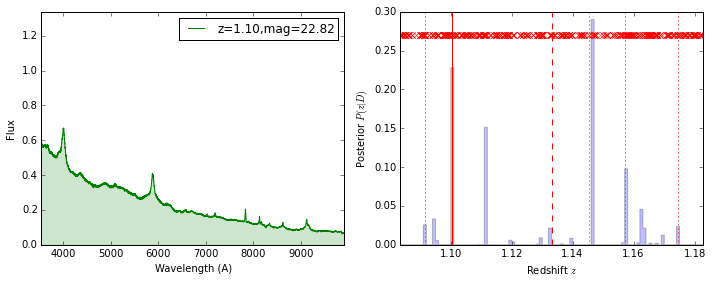

In [22]:
bayez.analysis.estimate_one(qso_estimator, qso_sampler, simulator4, seed=11, i=91)